# 0. Getting Started - Workspace

https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

# 1. Getting Started - Kaggle

1 - Criar uma conta no site da Kaggle.
https://www.kaggle.com

2 - Clicar no bonequinho **Your profile** -> **My Account**

3 - Procurar sessão *API* e clicar em **Create New API Token**

4 - Mover o arquivo baixado para sua pasta .kaggle



5 - Instalar o kaggle e baixar a base de dados do titanic

# 2. Conhecendo os Dados

## 2.1 Importação dos Dados

In [ ]:
#Import Pandas Library
import pandas as pd

train = pd.read_csv('competitions/titanic/train.csv')

### Tarefa 1
Importe a planilha de teste em uma variavel test

## 2.2 Quais os dados disponíveis para treinamento?

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [ ]:
train.head()

In [ ]:
test.head()

**Qual a diferença entre a tabela train e a test?**

**R: **

### Tarefa 2
Importe agora a planilha *gender_submission.csv* e visualize seu conteúdo.

**Qual você acredita que será o problema que iremos explorar?**

**R:**

# 3. Explorando o Problema

https://www.kaggle.com/c/titanic

Quantos são os dados disponíveis para treinamento? E como podemos ter um overview visualização deles?

In [ ]:
print(train.shape)
train.describe()

**Por quê algumas colunas sumiram?**

*Dica: O que as colunas restantes têm em comum entre si? E as eliminadas?*

**R: **

**Como podemos obter a média do parâmetro de interesse, sem imprimirmos a tabela completa?**

**Por que chamamos a função describe com parênteses e a shape sem?**

**R: ** 

## 1a Predição

Com a função .value_counts(), podemos visualizar quantos passageiros morreram e quantos sobreviveram.

Podemos também encontrar o valor percentual correspondente.

**Baseado nos números obtidos, se você tivesse que chutar, aleatoriamente, se uma pessoa morreu ou sobreviveu, o que você escolheria? Por quê?**

**R:**

In [ ]:
train["Survived_Prediction"] = #completar
train.head()

**Utilizando as funções já vistas, como poderíamos calcular a acurácia dessa suposição?**

In [ ]:
def accuracy(resposta, predicao):
    #inclua a função aqui
    return acuracia

accuracy(train["Survived"], train["Survived_Prediction"])

## 2a Predição

** Você acha que o fato de ser homem ou mulher pode ter influência sobre a taxa de sobrevivência? Por quê?**

**R:**

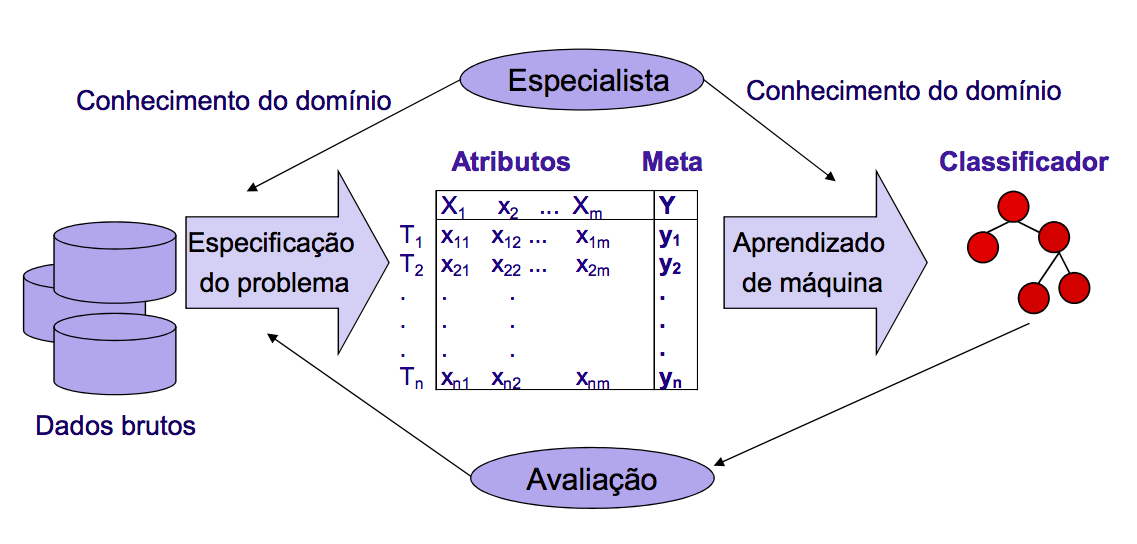

In [1]:
from IPython.display import Image
Image(filename='images/conhecimento_dados.png')

Para obtermos o número de sobreviventes homens e mulheres, temos:

In [ ]:
print("Sobreviventes Homens")
print(train["Survived"][train["Sex"] == 'male'].value_counts())
print("\nSobreviventes Mulheres")
print(train["Survived"][train["Sex"] == 'female'].value_counts())

Nota-se uma grande diferença no número de sobreviventes homens e mulheres. Contudo, nota-se também que a quantidade total de homens e de mulheres é diferente. Assim, não faz sentido compararmos que 468 homens morreram enquanto apenas 81 mulheres morreram, pois nem sequer haviam 468 mulheres no navio. Assim, faz-se necessária a normalização.

**Qual foi a taxa de sobrevivência masculina e a feminina?**

**Baseado nestas novas observações, como poderíamos melhorar a acurácia da nossa resposta?**
1. Altere os valores da coluna "Survived_Prediction"
2. Calcule a nova acurácia obtida


## 3a Predição

Será que a idade também influencia? Crie uma coluna chamada *Child* e atribua o valor "1" se for criança e "0" caso contrário. Então, faça a mesma análise que anteriormente e calcule a nova acurácia do modelo.

# Aprendizado de Máquina

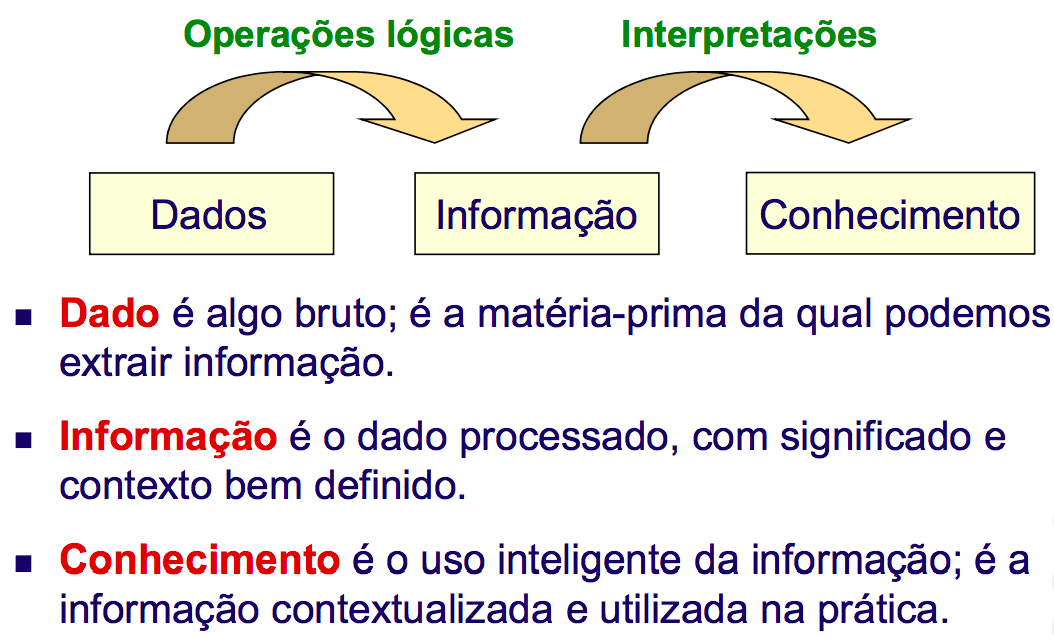

In [6]:
from IPython.display import Image
Image(filename='images/geracao_conhecimento.png')

In [ ]:
import numpy as np
from sklearn import tree

## 1o Passo: Limpeza e Formatação de Dados
1. Dados Faltantes
2. Dados Categóricos

### 1. Dados Faltantes
Uma estratégia amplamente utilizada é completar com o valor médio ou moda.

In [ ]:
print(train["Age"][:10])
train["Age"] = train["Age"].fillna(train["Age"].median())

In [ ]:
print(train["Embarked"].mode())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode())

### 2. Dados Categóricos

Para transformar dados categóricos em numéricos, podemos simplesmente transformá-los em números.
Por exemplo:

**Sexo**
- Masculino = 0
- Feminino = 1

**Classe de Embarque (Embarked)**
- S = 0
- C = 1
- Q = 2

In [ ]:
train["Sex"][train["Sex"] == "male"] = 0
#complete
train["Sex"][train["Sex"] == "female"] = 1

print(train["Sex"][:10])

Quando falamos de aprendizado de máquina, é comum falarmos de **features** e **target**, onde as features são as características disponíveis a partir das quais iremos aprender algo para predizer um determinado *label*, chamado de target.

In [ ]:
target = train["Survived"].values
features = train[["Sex", "Age"]].values

In [ ]:
my_tree = tree.DecisionTreeClassifier()
my_tree = my_tree.fit(features, target)

In [ ]:
print(my_tree.feature_importances_)

print(my_tree.score(features, target))

In [ ]:
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

**Extra:** Overfitting

In [ ]:
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features, target)

# Submissão no Kaggle

Agora utilizando a variável *test*, limpe os dados e utilize uma das formas de predição.

In [ ]:
# Impute the missing value with the median
test.Fare[152] = test.Fare.median()

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values

# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)


Então, devemos criar o nosso DataFrame a ser submetido.

In [ ]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = [ "Survived"])
print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])